In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
crypto = pd.read_csv("crypto_data.csv")
crypto.head()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0


In [3]:

## 1) Discard all crypto not being traded (filter for what IS being traded)
## 2) Drop the IsTrading column
## 3) Remove all rows that have at least 1 null value
## 4) Filter for crypto that have been mined (coins > 0) 
## 5) Data must be numeric, remove CoinName
## 6) Convert the rest of the text values in Algorithm and ProofType into numerical data
## 7) ^ Use pandas to convert to dummy variables (0 = no, 1 = yes) or whatever
## 8) Standardize the dataset so columns that contain large values don't influence results

crypto = crypto.loc[crypto['IsTrading'] == True]
crypto = crypto.loc[crypto['TotalCoinsMined'] > 0]
crypto["TotalCoinSupply"] = crypto["TotalCoinSupply"].astype(float)
crypto = crypto.dropna()
crypto = crypto.reset_index()
crypto.drop(['index','Unnamed: 0', 'CoinName', 'IsTrading'], axis = 'columns', inplace = True)
crypto = crypto.drop_duplicates()
crypto.head()                                   

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,4.200000e+01
1,Scrypt,PoW/PoS,1.055185e+09,5.320000e+08
2,X13,PoW/PoS,2.927942e+10,3.141593e+11
3,SHA-256,PoW,1.792718e+07,2.100000e+07
4,Ethash,PoW,1.076842e+08,0.000000e+00


In [4]:
crypto = pd.get_dummies(crypto)
crypto.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
scaler = StandardScaler()
scaled = scaler.fit_transform(crypto[['TotalCoinsMined', 'TotalCoinSupply']])
scaledcrypto = pd.DataFrame(scaled, columns = crypto.columns[:2])

for x in crypto.columns[2:]:
    scaledcrypto[x] = crypto[x].tolist()
scaledcrypto                             

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117219,-0.153017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.094102,-0.145163,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524239,4.485014,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116826,-0.152707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114860,-0.153017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,-0.073403,-0.123490,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,-0.116892,-0.149326,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
528,-0.095744,-0.132345,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,-0.117059,-0.152707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
pca = PCA(n_components = .90)
coinpca = pca.fit_transform(scaled)
cryptopca = pd.DataFrame(data = coinpca, columns=["principal component 1", "principal component 2"])
cryptopca.head()
pca.explained_variance_ratio_

array([0.85114593, 0.14885407])

In [9]:
tsne = TSNE(learning_rate = 35)
tsne_features = tsne.fit_transform(crypto)

C:\Users\saman\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


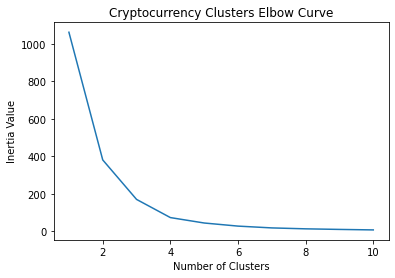

In [12]:
inertia = []
k = list(range(1, 11))

for i in k:
    kmean = KMeans(n_clusters = i, random_state = 0)
    kmean.fit(cryptopca)
    inertia.append(kmean.inertia_)

cryptoelbow = {"k": k, "inertia": inertia}
elbow = pd.DataFrame(cryptoelbow)

plt.plot(elbow['k'], elbow['inertia'])
plt.title('Cryptocurrency Clusters Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Value')
plt.show()

In [117]:
kmodel = KMeans(n_clusters = 4, random_state = 0)
kmodel.fit(cryptopca)

predictions = kmodel.predict(cryptopca)
cryptopca["class"] = kmodel.labels_
cryptopca.head()

,principal component 1,principal component 2,class
0,-0.191086,-0.025313,0
1,-0.169186,-0.036106,0
2,3.542077,2.800691,3
3,-0.190589,-0.025371,0
4,-0.189418,-0.026981,0


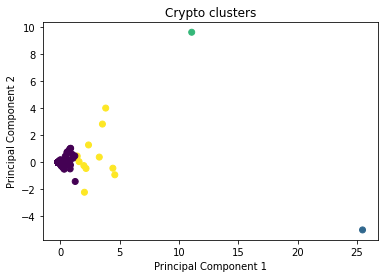

In [118]:
plt.scatter(x = cryptopca['principal component 1'],
            y = cryptopca['principal component 2'],
            c = cryptopca['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Crypto clusters')
plt.show()

## Recommendation: No, the cryptocurrencies in the data provided do not cluster together clearly. This may be due to the nature of cryptocurrency based on the lack of predictablity of the market. 

In [ ]:
    "## Recommendation: No, the cryptocurrencies in the data provided do not cluster together clearly. This may be due to the nature of cryptocurrency based on the lack of predictablity of the market.